In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
insurance_dataset = pd.read_csv(r"D:\Excel_csv\insurance.csv")
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_dataset.shape

(1338, 7)

In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

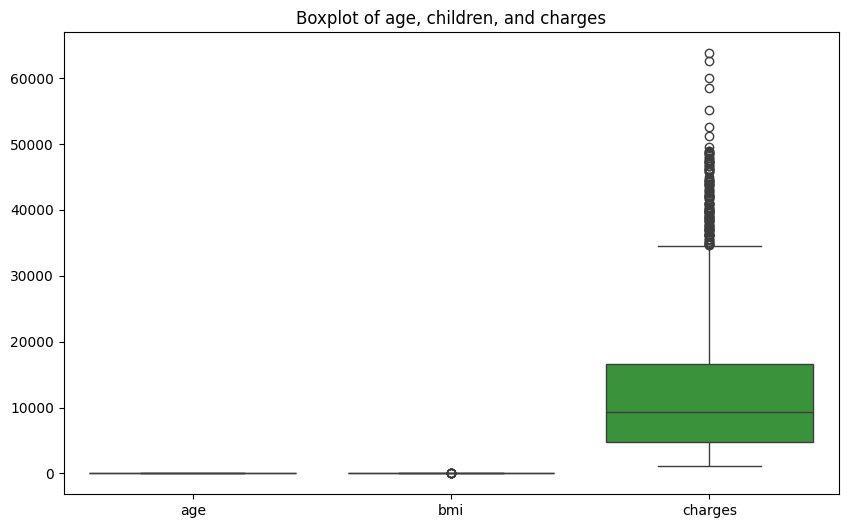

In [13]:
df_numeric = insurance_dataset[['age', 'bmi', 'charges']]

# Plotting the boxplot for all integer columns
plt.figure(figsize=(10,6))
sns.boxplot(data=df_numeric)
plt.title('Boxplot of age, children, and charges')
plt.show()

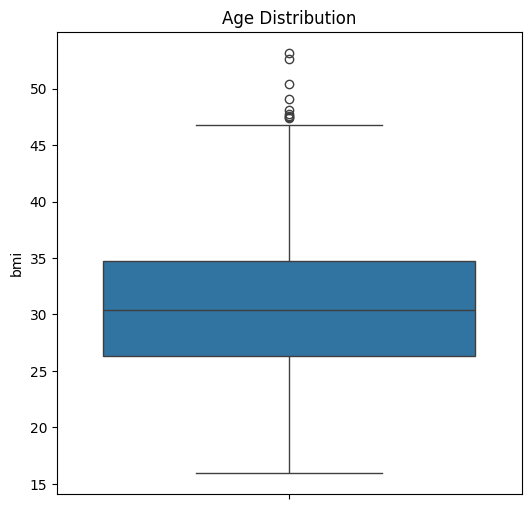

In [14]:
plt.figure(figsize=(6,6))
sns.boxplot(insurance_dataset['bmi'])
plt.title('Age Distribution')
plt.show()

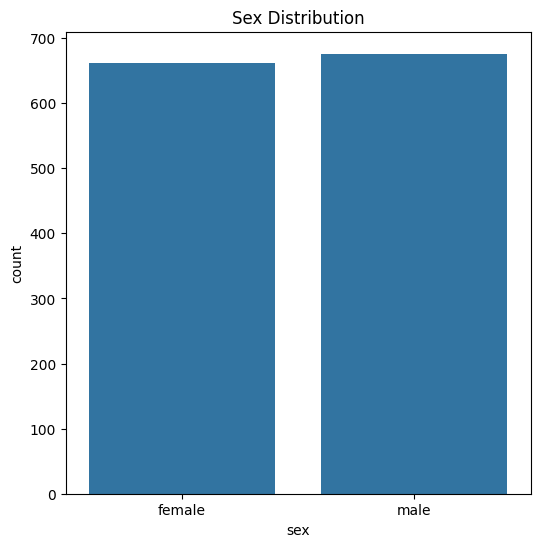

In [15]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [17]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [19]:
import pandas as pd

# Calculate the IQR for 'bmi' and 'charges' columns
Q1_bmi = insurance_dataset['bmi'].quantile(0.25)
Q3_bmi = insurance_dataset['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

# Cap outliers in 'bmi'
insurance_dataset['bmi'] = insurance_dataset['bmi'].apply(lambda x: min(max(x, lower_bound_bmi), upper_bound_bmi))

# Now, do the same for 'charges'
Q1_charges = insurance_dataset['charges'].quantile(0.25)
Q3_charges = insurance_dataset['charges'].quantile(0.75)
IQR_charges = Q3_charges - Q1_charges

lower_bound_charges = Q1_charges - 1.5 * IQR_charges
upper_bound_charges = Q3_charges + 1.5 * IQR_charges

# Cap outliers in 'charges'
insurance_dataset['charges'] = insurance_dataset['charges'].apply(lambda x: min(max(x, lower_bound_charges), upper_bound_charges))

# Check the updated DataFrame
print(insurance_dataset.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [20]:
insurance_dataset.shape

(1338, 7)

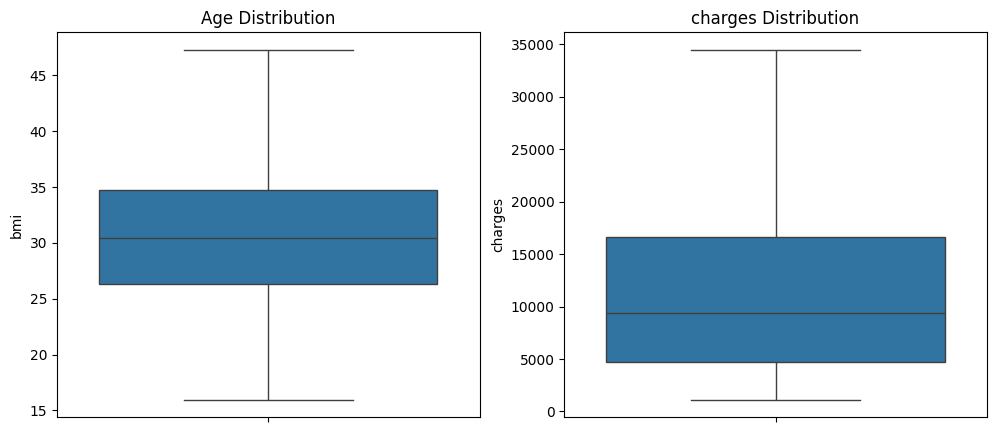

In [29]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(insurance_dataset['bmi'])
plt.title('Age Distribution')
plt.subplot(1,2,2)
sns.boxplot(insurance_dataset['charges'])
plt.title('charges Distribution')

plt.show()

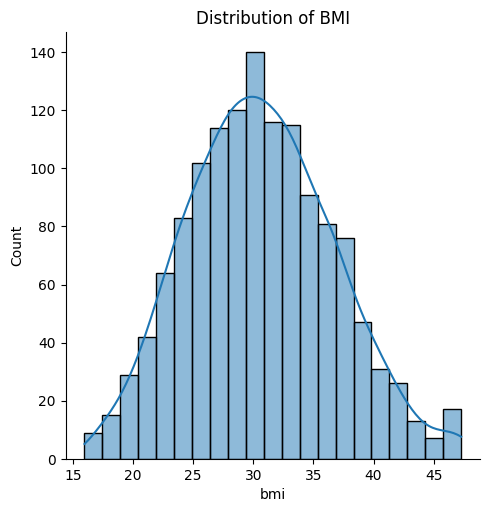

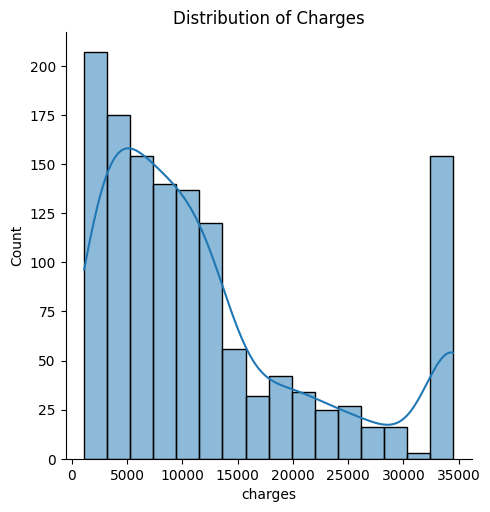

In [33]:
# plt.figure(figsize=(6,6))
# plt.subplot(1,2,1)
# sns.distplot(insurance_dataset['bmi'],kde=True)
# plt.title('BMI Distribution')
# plt.subplot(1,2,2)
# sns.distplot(insurance_dataset['charges'],kde=True)
# plt.title('Charges Distribution')
# plt.show()
sns.displot(insurance_dataset['bmi'], kde=True)
plt.title('Distribution of BMI')
plt.show()

sns.displot(insurance_dataset['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

In [34]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.650034,1.094918,12479.369251
std,14.049960,6.056926,1.205493,10158.056096
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,47.290000,5.000000,34489.350562


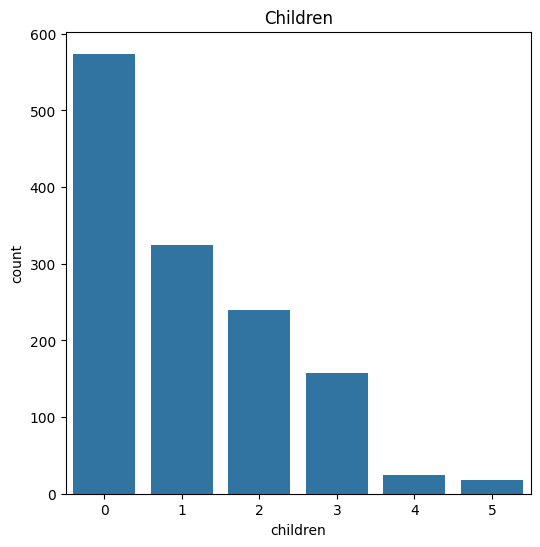

In [35]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [36]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [37]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [38]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [39]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11724\2871422651.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11724\2871422651.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11724\2871422651.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To

In [40]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [41]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [52]:
# insurance_dataset[insurance_dataset.duplicated()].sum()

In [51]:
insurance_dataset.duplicated().sum()

np.int64(1)

In [53]:
insurance_dataset=insurance_dataset.drop_duplicates()

In [54]:
insurance_dataset.shape

(1337, 7)

In [55]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [56]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1337 rows x 6 columns]


In [57]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [59]:
print(X.shape, X_train.shape, X_test.shape)

(1337, 6) (1069, 6) (268, 6)


In [60]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Assuming you already have your X (features) and Y (target) data
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# List of regression models to check
models = [
    ('Linear Regression', LinearRegression()),  # Linear Regression
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=100)),  # Random Forest Regressor
    ('Support Vector Regressor', SVR()),  # Support Vector Regressor
    ('K-Nearest Neighbors Regressor', KNeighborsRegressor()),  # K-Nearest Neighbors Regressor
    ('Decision Tree Regressor', DecisionTreeRegressor())  # Decision Tree Regressor
]

# Dictionary to store performance results
results = {}

# Loop through models and calculate performance
for name, model in models:
    # Train the model
    model.fit(X_train, Y_train)
    
    # Make predictions
    Y_pred = model.predict(X_test)
    
    # Calculate R² and MSE for regression
    r2 = r2_score(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    results[name] = r2  # Store R² score for each model
    print(f"{name} R^2: {r2:.2f} | MSE: {mse:.2f}")

# Find the best performing model (highest R^2 score)
best_model = max(results, key=results.get)
print(f"\nThe best performing model is {best_model} with R^2: {results[best_model]:.2f}")


Linear Regression R^2: 0.82 | MSE: 21060705.13
Random Forest Regressor R^2: 0.84 | MSE: 18172024.18
Support Vector Regressor R^2: -0.12 | MSE: 130661105.24
K-Nearest Neighbors Regressor R^2: 0.09 | MSE: 105922549.76
Decision Tree Regressor R^2: 0.66 | MSE: 39286728.98

The best performing model is Random Forest Regressor with R^2: 0.84


Random Forest Regressor R²: 0.85
Random Forest Regressor MSE: 18030681.47


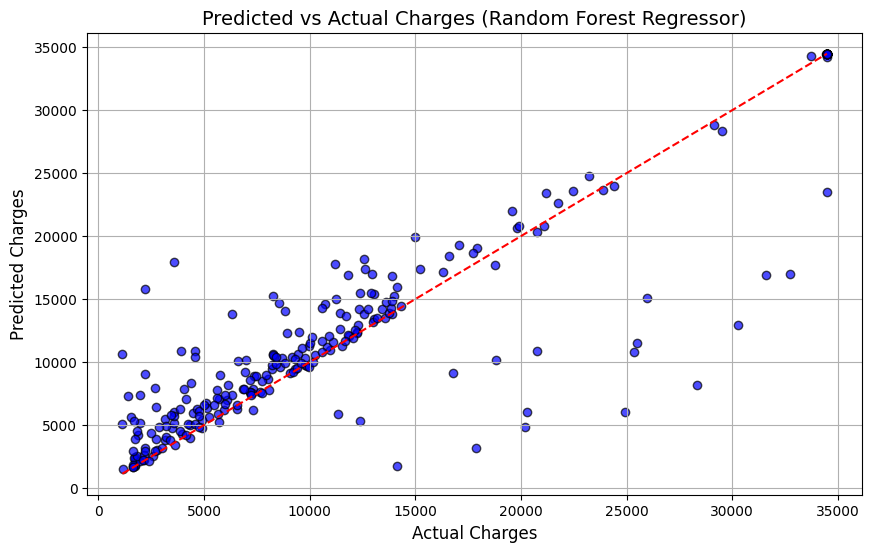

      Actual Charges  Predicted Charges
900      8688.858850       10351.760218
1064     5708.867000        7045.213194
1256    11436.738150       12589.839356
298     34489.350562       34489.350562
237      4463.205100        5926.697441
481      9304.701900        9481.231141
240     34489.350562       34477.140168
277      2150.469000        2198.477091
415      7345.726600        8930.878687
707     10264.442100       10555.387631


In [65]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, Y_pred)  # R² score
mse = mean_squared_error(Y_test, Y_pred)  # Mean Squared Error

print(f"Random Forest Regressor R²: {r2:.2f}")
print(f"Random Forest Regressor MSE: {mse:.2f}")

# Visualizing the Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', edgecolor='black', alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Identity line
plt.title("Predicted vs Actual Charges (Random Forest Regressor)", fontsize=14)
plt.xlabel("Actual Charges", fontsize=12)
plt.ylabel("Predicted Charges", fontsize=12)
plt.grid(True)
plt.show()


# Optionally, you can compare predicted charges with actual ones:
comparison = pd.DataFrame({'Actual Charges': Y_test, 'Predicted Charges': Y_pred})
print(comparison.head(10))  # Show a comparison of the first 10 predicted vs actual values